# Exploratory Data Analysis on the German Data Credit
notebook created by Rachel Ullmann

Source Information: Professor Dr. Hans Hofmann Institut f"ur Statistik und "Okonometrie Universit"at Hamburg FB Wirtschaftswissenschaften Von-Melle-Park 5 2000 Hamburg 13 

This notebook covers the following:
1. Univariate Analysis
2. Bivariate Analysis
3. Correlations
4. Data Reduction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

In [3]:
##reading original data
original = pd.read_csv (r'German_credit_TRAIN.csv').set_index('ID')

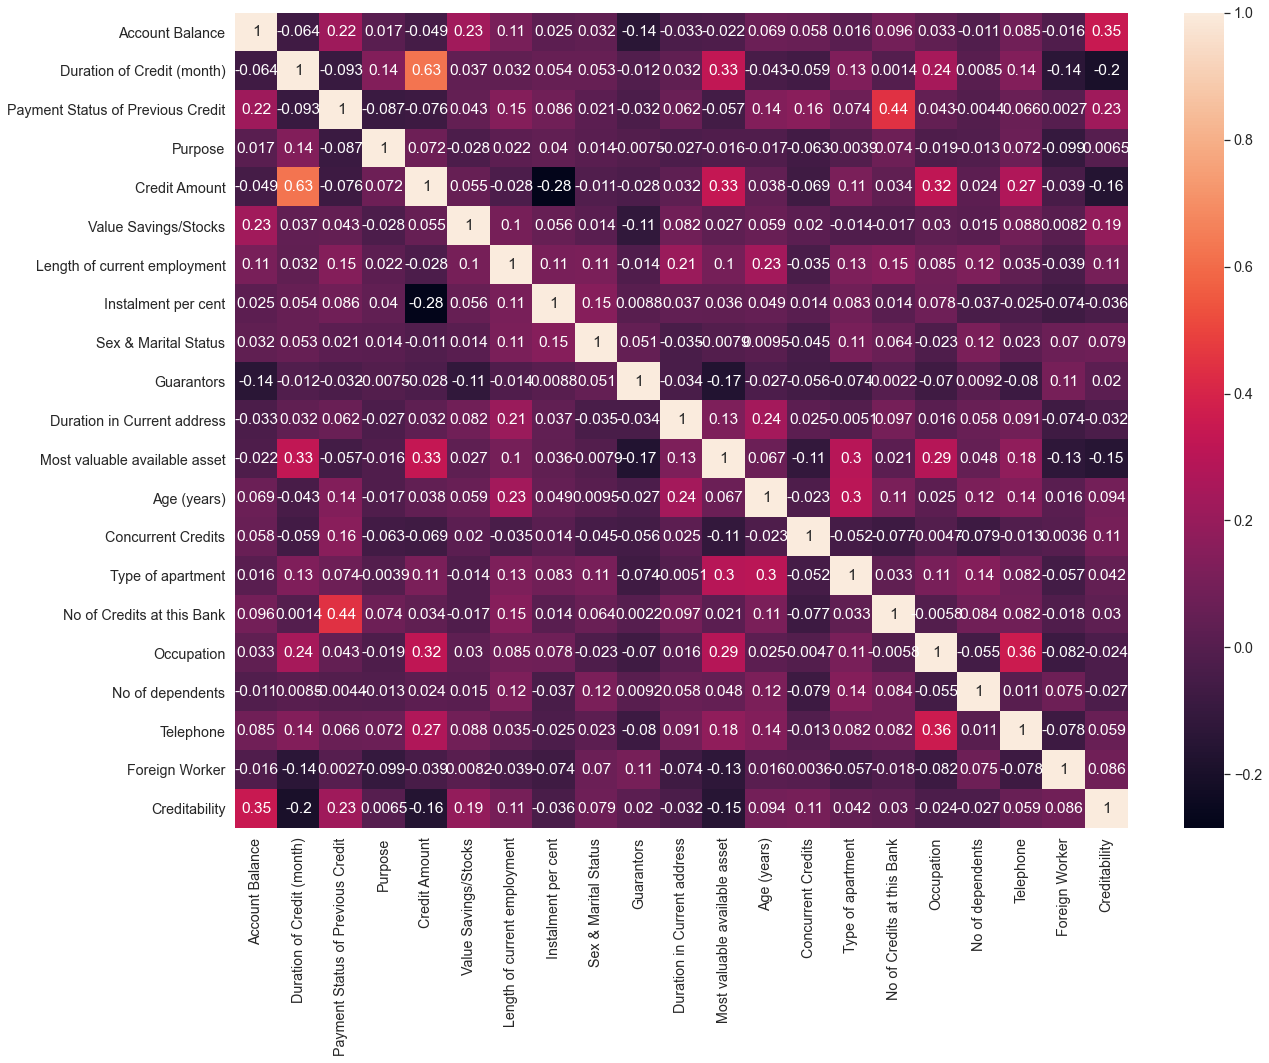

In [5]:
##produce initial heatmap without dummy variables
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(20,15))  
sns.heatmap(original.corr(), annot = True)

Feature engineering and variable selection process is done in Orange

In [6]:
##reading new data
data = pd.read_csv (r'traincleanpython.csv').set_index('ID')

In [7]:
# see how the data is like

data.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Guarantors,Duration in Current address,Most valuable available asset,...,No of Credits at this Bank,No of dependents,Telephone,Foreign Worker,Marital Status,Gender,Purpose of Loan,Occupations,Current debts,Creditability
ID,,,,,,,,,,,,,,,,,,,,,
151,Little,48,No Debt,3051,Little,1-4 years,25%-35%,None,> 7 Years,Car,...,1,<3,No,No,Single,Male,Household Appliance,Skilled,None,Bad
152,Little,21,Critical,571,Little,>7 years,>35%,None,> 7 Years,Own a house,...,2 or 3,<3,No,No,Single,Male,Car,Skilled,None,Good
153,Little,18,No Debt,1345,Little,1-4 years,>35%,None,4-7 Years,Own a house,...,1,<3,No,No,Married,Male,Household Appliance,Skilled,None,Bad
154,Little,15,No Debt,806,Little,1-4 years,>35%,None,> 7 Years,Life Insurance,...,1,<3,No,No,Married,Female,Business/Equipment,Unemployed/Unskilled,None,Good
155,Rich,4,No Debt,1494,Unknown,< 1 year,<20%,None,1-4 Years,Own a house,...,1,>=3,No,Yes,Single,Male,Car,Unemployed/Unskilled,None,Good


In [8]:
data.describe()

,Duration of Credit (month),Credit Amount,Age (years)
count,800.000000,800.00000,800.00000
mean,21.005000,3279.12875,35.04000
std,12.145446,2899.75133,11.13939
min,4.000000,276.00000,19.00000
25%,12.000000,1344.75000,26.00000
50%,18.000000,2286.00000,33.00000
75%,24.000000,3979.50000,41.00000
max,72.000000,18424.00000,75.00000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 151 to 950
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Account Balance                    800 non-null    object
 1   Duration of Credit (month)         800 non-null    int64 
 2   Payment Status of Previous Credit  800 non-null    object
 3   Credit Amount                      800 non-null    int64 
 4   Value Savings/Stocks               800 non-null    object
 5   Length of current employment       800 non-null    object
 6   Instalment per cent                800 non-null    object
 7   Guarantors                         800 non-null    object
 8   Duration in Current address        800 non-null    object
 9   Most valuable available asset      800 non-null    object
 10  Age (years)                        800 non-null    int64 
 11  Type of apartment                  800 non-null    object
 12  No of 

In [10]:
##view relaltionships between numerical variables
data.corr()

,Duration of Credit (month),Credit Amount,Age (years)
Duration of Credit (month),1.000000,0.62582,-0.043434
Credit Amount,0.625820,1.00000,0.038020
Age (years),-0.043434,0.03802,1.000000


# Univariate Analysis

### In this section:

•	The values and frequencies of each variable will be analysed to give an understanding of the dataset and identify any skewed data


## Numeric Variables

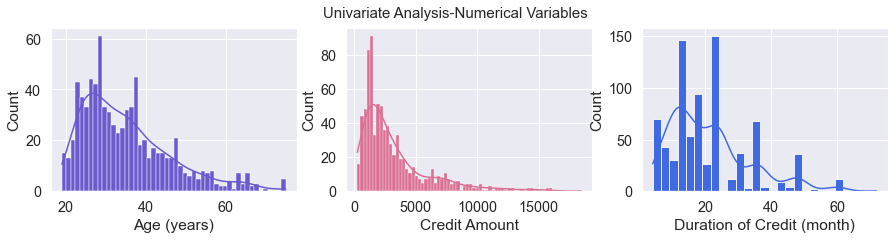

In [11]:
##subplot of numeric features
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=False)
fig.suptitle('Univariate Analysis-Numerical Variables', size=15)

##Credit Amount distribution
sns.histplot(data=data,ax=axes[1], x="Credit Amount", kde=True, color='palevioletred', bins=70,alpha=1)

##Age distribution
sns.histplot(data=data, ax=axes[0],x="Age (years)", kde=True, color='slateblue', bins=50,alpha=1)

##Credit Duration distribution
sns.histplot(data=data, ax=axes[2],x="Duration of Credit (month)", kde=True, color='royalblue',alpha=1)

## Categorical Variables

Text(0.5, 1.0, 'No. of Good or Bad loans (Target Variable)')

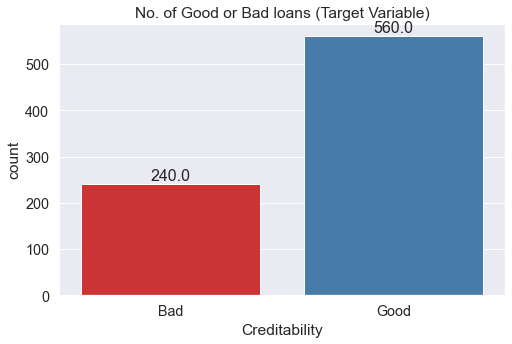

In [12]:
##count plot of Target Variable
fig = plt.figure(figsize=(8, 5))
plots=sns.countplot(data=data, x="Creditability", palette="Set1", alpha=1)
##showing value on each bar
for p in plots.patches:
    plots.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=16)
plots.set_title("No. of Good or Bad loans (Target Variable)")

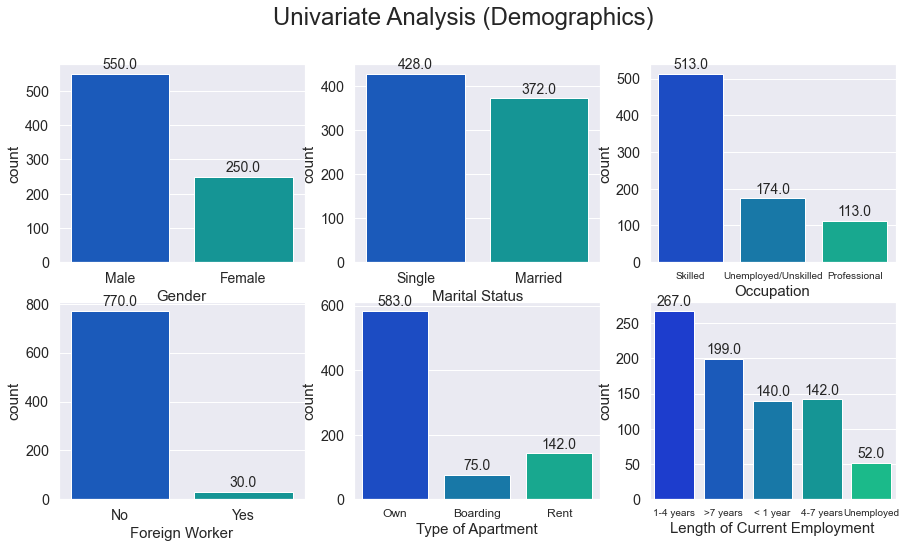

In [13]:
##subplot of important features based on demographics
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=False)
fig.suptitle('Univariate Analysis (Demographics)', size=24)

##Gender distribution
ax0=sns.countplot(data=data,ax=axes[0,0], x="Gender", palette="winter")
ax0.set_xlabel("Gender", size=15)
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax0.set_title("[1]")

##Marital Status distribution
ax1=sns.countplot(data=data,ax=axes[0,1], x="Marital Status", palette="winter")
ax1.set_xlabel("Marital Status", size=15)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax1.set_title("[2]")

##Occupation distribution
ax2=sns.countplot(data=data,ax=axes[0,2], x="Occupations", palette="winter")
ax2.set_xlabel("Occupation", size=15)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax2.set_title("[3]")

##Foreign Worker distribution
ax3=sns.countplot(data=data,ax=axes[1,0], x="Foreign Worker", palette="winter")
ax3.set_xlabel("Foreign Worker", size=15)
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax3.set_title("[4]")

##Type of Apartment distribution
ax4=sns.countplot(data=data,ax=axes[1,1], x="Type of apartment", palette="winter")
ax4.set_xlabel("Type of Apartment", size=15)
for p in ax4.patches:
    ax4.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax4.set_title("[5]")

##Length of current employment distribution
ax5=sns.countplot(data=data,ax=axes[1,2], x="Length of current employment", palette="winter")
ax5.set_xlabel("Length of Current Employment", size=15)
for p in ax5.patches:
    ax5.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax5.set_title("[6]", fontsize=20)

ax0.tick_params(axis='x',labelsize=14)
ax1.tick_params(axis='x',labelsize=14)
ax2.tick_params(axis='x',labelsize=10)
ax3.tick_params(axis='x',labelsize=14)
ax4.tick_params(axis='x',labelsize=12)
ax5.tick_params(axis='x',labelsize=10)

Text(0.5, 0, 'Payment Credit Status')

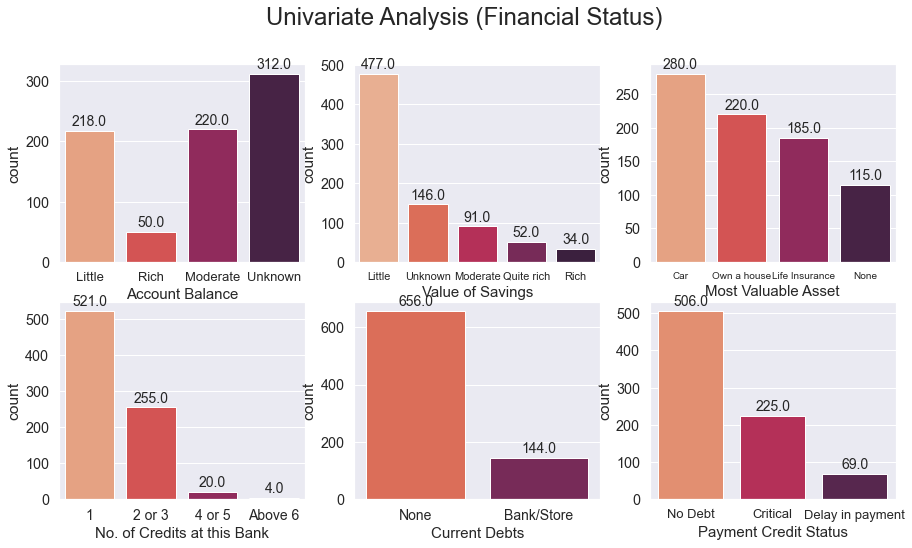

In [14]:
##subplot of important features based on financial status
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=False)
fig.suptitle('Univariate Analysis (Financial Status)', size=24)

##Account Balance distribution
ax6=sns.countplot(data=data,ax=axes[0,0], x="Account Balance", palette="rocket_r")
for p in ax6.patches:
    ax6.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax6.set_title("Account Balance Distribution")

##Value Savings/Stocks distribution
ax7=sns.countplot(data=data,ax=axes[0,1], x="Value Savings/Stocks", palette="rocket_r")
for p in ax7.patches:
    ax7.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax7.set_title("Value Savings/Stocks Distribution")

##Most valuable available asset distribution
ax8=sns.countplot(data=data,ax=axes[0,2], x="Most valuable available asset", palette="rocket_r")
for p in ax8.patches:
    ax8.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax8.set_title("Most valuable available asset")

##No of Credits at this Bank distribution
ax9=sns.countplot(data=data,ax=axes[1,0], x="No of Credits at this Bank", palette="rocket_r")
for p in ax9.patches:
    ax9.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax9.set_title("No of Credits at this Bank Distribution")

##Current debts distribution
ax10=sns.countplot(data=data,ax=axes[1,1], x="Current debts", palette="rocket_r")
for p in ax10.patches:
    ax10.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax10.set_title("Current debts Distribution")

##Payment Status of Previous Credit distribution
ax11=sns.countplot(data=data,ax=axes[1,2], x="Payment Status of Previous Credit", palette="rocket_r")
for p in ax11.patches:
    ax11.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
##ax11.set_title("Payment Status of Previous Credit")

ax6.tick_params(axis='x',labelsize=13)
ax7.tick_params(axis='x',labelsize=11)
ax8.tick_params(axis='x',labelsize=10)
ax9.tick_params(axis='x',labelsize=14)
ax10.tick_params(axis='x',labelsize=14)
ax11.tick_params(axis='x',labelsize=13)

ax6.set_xlabel("Account Balance", size=15)
ax7.set_xlabel("Value of Savings", size=15)
ax8.set_xlabel("Most Valuable Asset", size=15)
ax9.set_xlabel("No. of Credits at this Bank", size=15)
ax10.set_xlabel("Current Debts", size=15)
ax11.set_xlabel("Payment Credit Status", size=15)


Text(0.5, 0, 'Purpose of Loan')

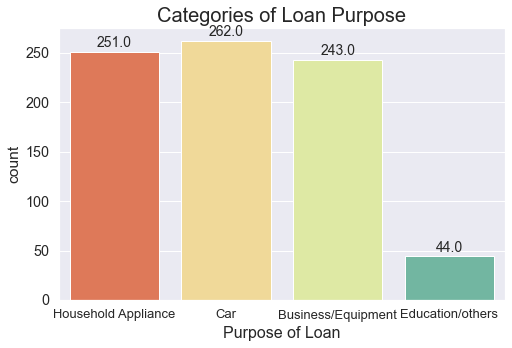

In [15]:
##plot on the Loan Purpose Variable
fig = plt.figure(figsize=(8, 5))
axpurpose=sns.countplot(data=data, x="Purpose of Loan", palette="Spectral")
for p in axpurpose.patches:
    axpurpose.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  size=14)
axpurpose.set_title("Categories of Loan Purpose", size=20)
axpurpose.tick_params(axis='x',labelsize=13)
axpurpose.set_xlabel("Purpose of Loan", size=16)

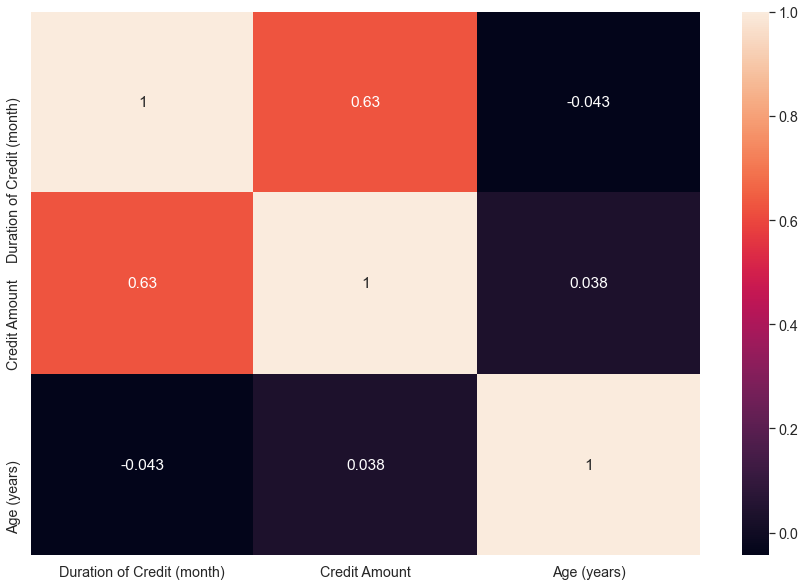

In [17]:
##simple heaetmap visualisation of numerical features
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(data.corr(), annot = True)

# Bivariate Analysis

### In this section:
•	Relationships between 2 or more variables will be observed with each other and the target variable using violin plots, box plots and crosstabulations
•	This report will focus on the target ‘Creditability’ against other predictors

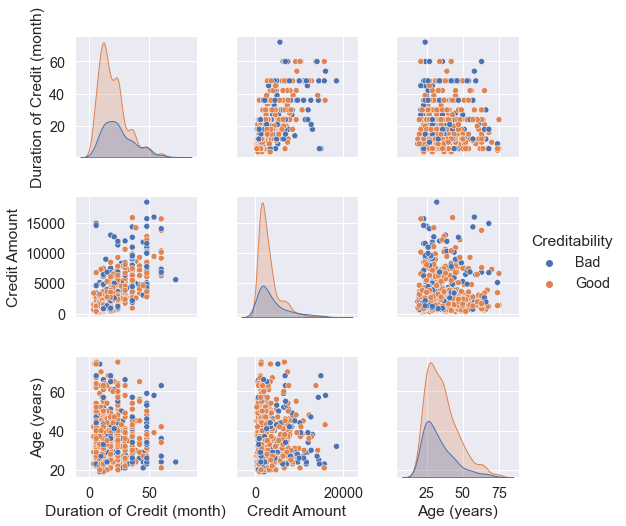

In [18]:
# pairplot - useful to examine the relationship between numeric variables 

sns.pairplot(data, hue="Creditability")

In [19]:
##crosstab on creditability VS Gender
pd.crosstab(data['Creditability'], data['Gender'], normalize='index').style.set_caption("Crosstab: Creditability VS Gender")

Gender,Female,Male
Creditability,,
Bad,0.362500,0.637500
Good,0.291071,0.708929


In [20]:
# three way crosstab on loan purpose, creditability and gender
pd.crosstab(index=[data['Purpose of Loan'], data['Gender']],columns=data['Creditability'],margins=True,normalize='index').round(3).style.set_caption("Crosstab: Looking at Creditability, Loan Purpose and Gender")



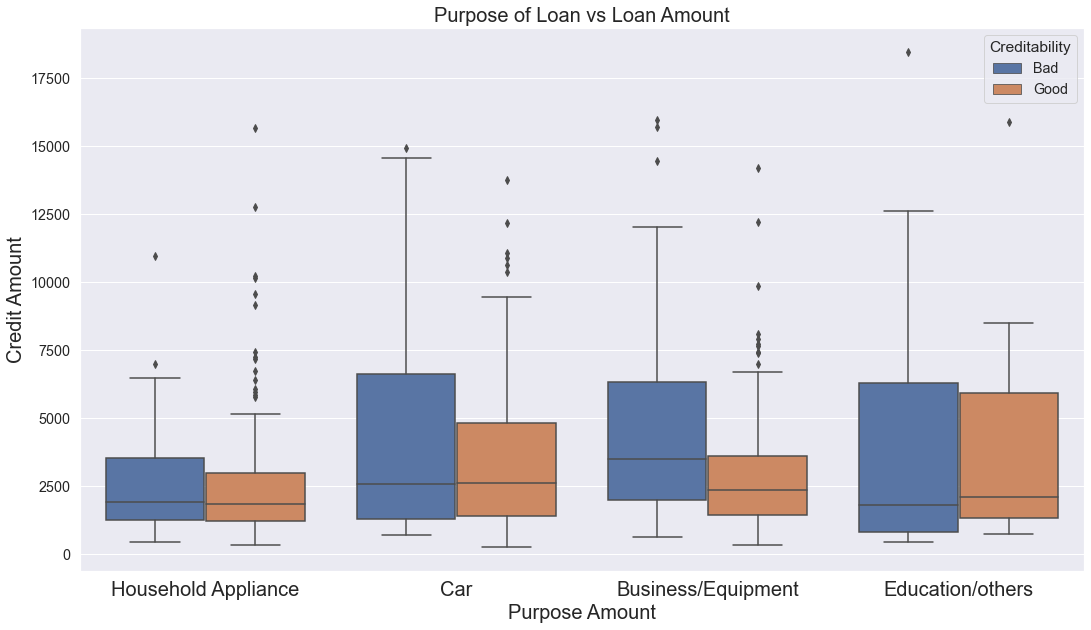

<Figure size 432x288 with 0 Axes>

In [21]:
##visulisation of boxplot on purpose of loan and loam amount
plt.figure(figsize=(18,10))
fig=sns.boxplot(data =data, x='Purpose of Loan', y='Credit Amount', hue ='Creditability')
plt.title('Purpose of Loan vs Loan Amount',size='20')
fig.tick_params(axis='x',labelsize=20)
fig.set_ylabel("Credit Amount", size=20)
fig.set_xlabel("Purpose Amount", size=20)
plt.show()
plt.savefig(r'purpose.png')

In [22]:
# three way crosstab on account balance, creditability and gender
pd.crosstab(index=[data['Account Balance'], data['Gender']],columns=data['Creditability'],margins=True, normalize='index').round(3).style.set_caption("Crosstab: Looking at Creditability, Account Balance and Gender")




In [23]:
# three way crosstab on credit history, creditability and gender
pd.crosstab(index=[data['Payment Status of Previous Credit'], data['Gender']],columns=data['Creditability'],margins=True, normalize='index').style.set_caption("Crosstab: Looking at Creditability, credit history and Gender")
                        
                        

<Figure size 1152x864 with 0 Axes>

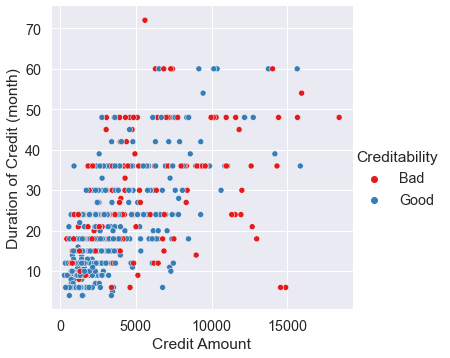

In [24]:
##scatterplot to view relationship between credit amount and duration of credit based on risk
plt.figure(figsize=(16,12))
sns.relplot(x="Credit Amount", y="Duration of Credit (month)", hue="Creditability", palette="Set1",
            data=data);
plt.show()

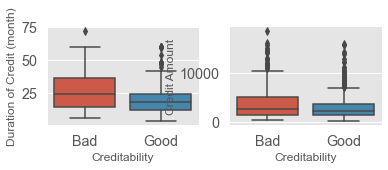

In [25]:
##subplot on duration of loan and loan amount VS creditability
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.boxplot(x = 'Creditability', y = 'Duration of Credit (month)', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'Creditability', y = 'Credit Amount', data = data)


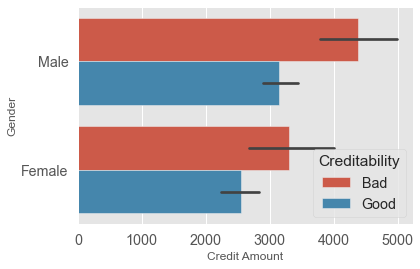

In [26]:
##barplot looking at gender and creditability
sns.barplot(data=data, y="Gender",x="Credit Amount",hue="Creditability")

Text(0.5, 0, 'Most Valuable Asset')

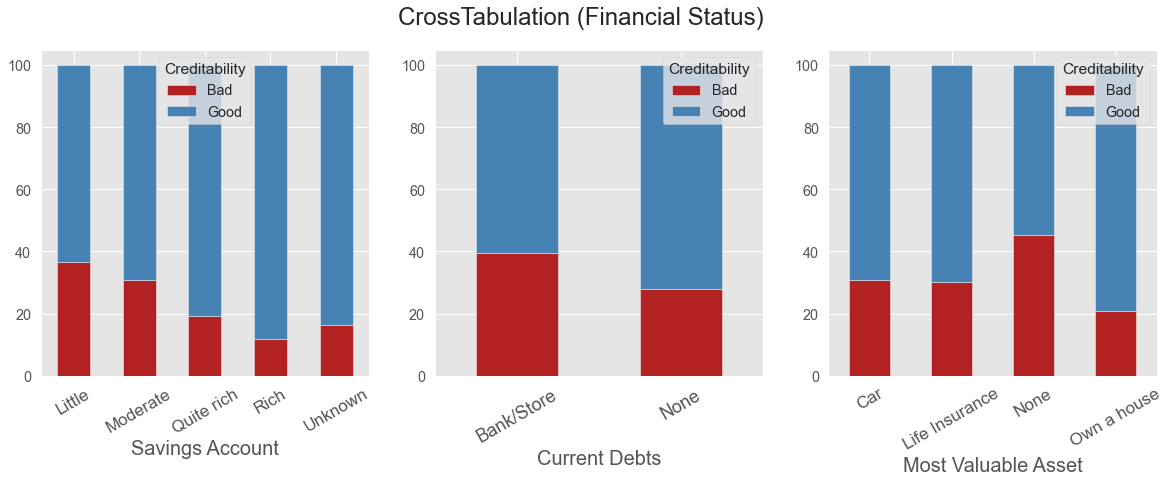

In [27]:
##subplot based on crosstab of financial status features on creditablity
figure, axes = plt.subplots(1, 3,figsize=(20,6))
figure.suptitle('CrossTabulation (Financial Status)', size=24)
fig2=pd.crosstab(data['Value Savings/Stocks'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, ax=axes[0],color=["FireBrick","SteelBlue"])
fig3=pd.crosstab(data['Current debts'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, ax=axes[1],color=["FireBrick","SteelBlue"])
fig4=pd.crosstab(data['Most valuable available asset'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True,ax=axes[2],color=["FireBrick","SteelBlue"])
fig2.tick_params(axis='x',labelsize=17, labelrotation=30)
fig3.tick_params(axis='x',labelsize=18, labelrotation=30)
fig4.tick_params(axis='x',labelsize=17, labelrotation=30)
fig2.set_xlabel("Savings Account", size=20)
fig3.set_xlabel("Current Debts", size=20)
fig4.set_xlabel("Most Valuable Asset", size=20)

Text(0.5, 0, 'Guarantors')

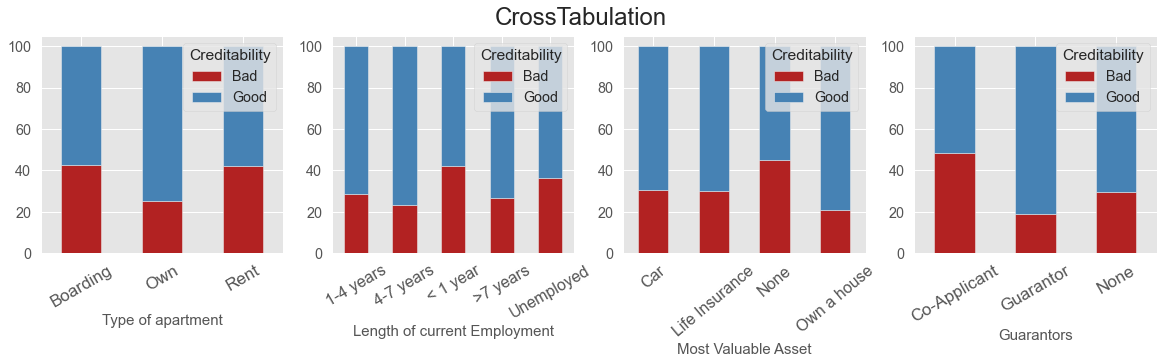

In [28]:
##subplot based on crosstab of important features on creditablity
figure, axes = plt.subplots(1, 4,figsize=(20,4))
figure.suptitle('CrossTabulation', size=24)
fig5=pd.crosstab(data['Type of apartment'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True,ax=axes[0],color=["FireBrick","SteelBlue"])
fig6=pd.crosstab(data['Length of current employment'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True,ax=axes[1],color=["FireBrick","SteelBlue"])
fig7=pd.crosstab(data['Most valuable available asset'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True,ax=axes[2],color=["FireBrick","SteelBlue"])
fig8=pd.crosstab(data['Guarantors'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True,ax=axes[3],color=["FireBrick","SteelBlue"])

fig5.tick_params(axis='x',labelsize=17, labelrotation=30)
fig6.tick_params(axis='x',labelsize=16, labelrotation=30)
fig7.tick_params(axis='x',labelsize=16, labelrotation=40)
fig8.tick_params(axis='x',labelsize=17, labelrotation=30)
fig5.set_xlabel("Type of apartment", size=15)
fig6.set_xlabel("Length of current Employment", size=15)
fig7.set_xlabel("Most Valuable Asset", size=15)
fig8.set_xlabel("Guarantors", size=15)


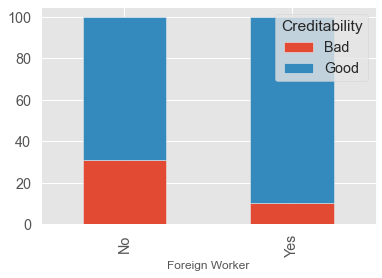

In [29]:
##crosstab of foreign worker on creditablity
pd.crosstab(data['Foreign Worker'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)

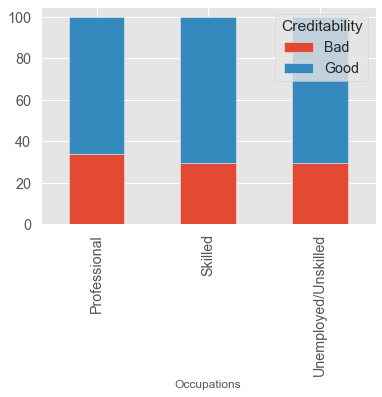

In [30]:
##crosstab of occupations on creditablity
pd.crosstab(data['Occupations'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)

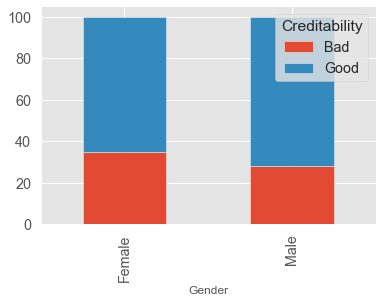

In [31]:
##crosstab of gender on creditablity
pd.crosstab(data['Gender'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)

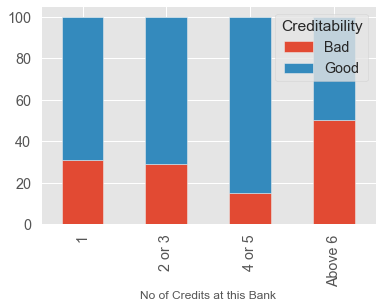

In [32]:
##crosstab of No. of credits on creditablity
pd.crosstab(data['No of Credits at this Bank'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)

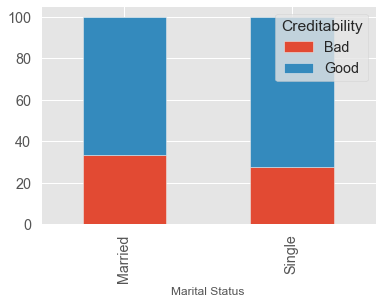

In [33]:
##crosstab of marital status on creditablity
pd.crosstab(data['Marital Status'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)

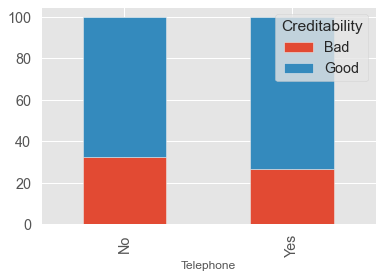

In [34]:
##crosstab of telephone on creditablity
pd.crosstab(data['Telephone'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)

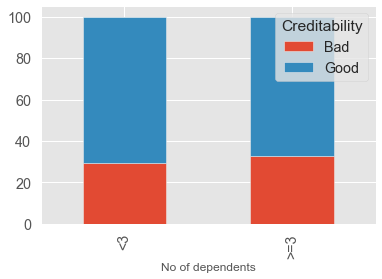

In [35]:
##crosstab of no. of dependants on creditablity
pd.crosstab(data['No of dependents'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)

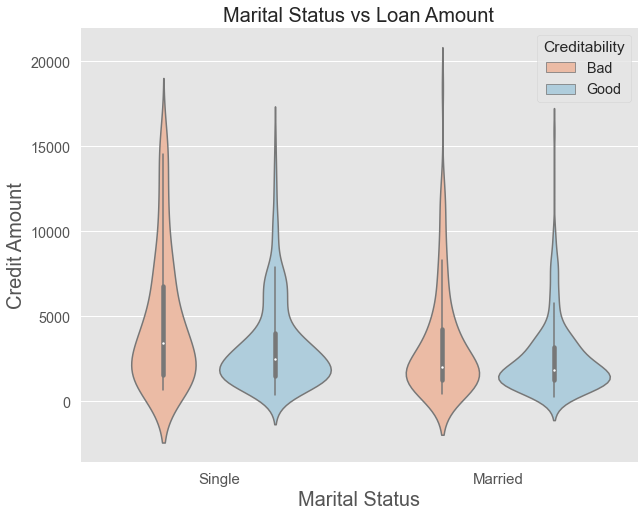

In [36]:
##violin plot of marital status VS credit amount on creditablity
plt.figure(figsize=(10,8)) #figure size
plt.title('Marital Status vs Loan Amount',size='20')
g = sns.violinplot(x='Marital Status', y='Credit Amount', 
                   data=data, hue="Creditability",palette="RdBu")
g.tick_params(axis='x',labelsize=15)

g.set_xlabel("Marital Status", size=20)
g.set_ylabel("Credit Amount", size=20)
plt.savefig(r'debtsvsloan.png')

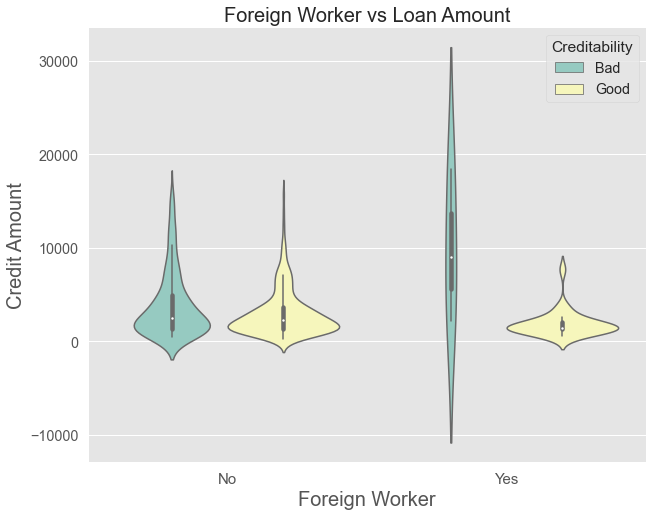

In [37]:
##violin plot of foreign worker VS credit amount on creditablity
plt.figure(figsize=(10,8)) #figure size
plt.title('Foreign Worker vs Loan Amount',size='20')
g = sns.violinplot(x='Foreign Worker', y='Credit Amount', 
                   data=data, hue="Creditability",palette="Set3")
g.tick_params(axis='x',labelsize=15)

g.set_xlabel("Foreign Worker", size=20)
g.set_ylabel("Credit Amount", size=20)
plt.savefig(r'foreignsvsloan.png')

In [38]:
##creating cross tab for next chart
cross_checking = pd.crosstab(data['Creditability'], data['Account Balance']).apply(lambda x: x/x.sum() * 100)
##rounding indx
decimals = pd.Series([2,2,2,2], index=['little', 'moderate', 'rich','unknown'])

cross_checking = cross_checking.round(decimals)
cross_checking

Account Balance,Little,Moderate,Rich,Unknown
Creditability,,,,
Bad,49.082569,39.545455,20.0,11.538462
Good,50.917431,60.454545,80.0,88.461538


In [40]:
##import libraries
from chart_studio import plotly
from chart_studio.plotly import plot, iplot
##import plotly.plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

##create interactive bar chart analysis based on wealth VS risk
bad_little = cross_checking['Little'][0]
good_little = cross_checking['Little'][1]
bad_moderate = cross_checking['Moderate'][0]
good_moderate = cross_checking['Moderate'][1]
bad_rich = cross_checking['Rich'][0]
good_rich = cross_checking['Rich'][1]
bad_unknown = cross_checking['Unknown'][0]
good_unknown = cross_checking['Unknown'][1]
little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

unknown = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_unknown, good_unknown],
    name="Unknown Wealth",
    text='%',
    xaxis='x3',
    yaxis='y3',
    marker=dict(
        color='#E7F541',
         line=dict(
            color='#CCDA20',
            width=1.5),
    ),
)

data=[little, moderate, rich, unknown]

fig = make_subplots(rows=1, cols=4, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth', 'Unknown Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)
fig.append_trace(unknown, 1, 4)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +' by Wealth')
##iplot(fig, filename='make-subplots-multiple-with-titles')
fig.show()

In [41]:
data = pd.read_csv (r'traincleanpython.csv').set_index('ID')

In [42]:
##categorzing age for chart purpose
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young Adult', 'Adult', 'Senior']
data["Age Category"] = pd.cut(data['Age (years)'], interval, labels=cats)

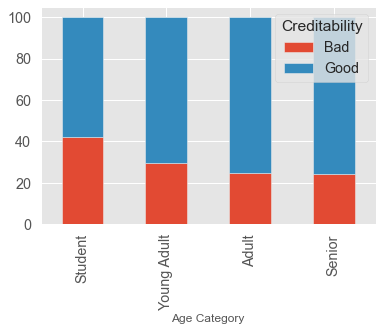

In [43]:
##create cross tab to show age cat vs creditablity
pd.crosstab(data['Age Category'], data['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)

In [44]:
##preparing data for chart
cross_check= pd.crosstab(data['Creditability'], data['Age Category']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2,2], index=['Student', 'Young Adult', 'Adult','Senior'])

cross_check = cross_check.round(decimals)
cross_check

Age Category,Student,Young Adult,Adult,Senior
Creditability,,,,
Bad,42.24,29.34,24.57,24.24
Good,57.76,70.66,75.43,75.76


In [45]:
##create interactive bar chart analysis based on Age cat VS risk
bad_student = cross_check['Student'][0]
good_student = cross_check['Student'][1]
bad_youngadult = cross_check['Young Adult'][0]
good_youngadult = cross_check['Young Adult'][1]
bad_adult = cross_check['Adult'][0]
good_adult = cross_check['Adult'][1]
bad_senior = cross_check['Senior'][0]
good_senior = cross_check['Senior'][1]
student = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_student, good_student],
    name="student",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)
YoungAdult = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_youngadult, good_youngadult],
    name="Young Adult",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
Adult = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_adult, good_adult],
    name="Adult",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

Senior = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_senior, good_senior],
    name="Senior",
    text='%',
    xaxis='x3',
    yaxis='y3',
    marker=dict(
        color='#E7F541',
         line=dict(
            color='#CCDA20',
            width=1.5),
    ),
)

data=[student, "young adult", Adult, Senior]

fig1 = make_subplots(rows=1, cols=4, subplot_titles=('Student', 'Young Adult', 'Adult', 'Senior'))

fig1.append_trace(little, 1, 1)
fig1.append_trace(moderate, 1, 2)
fig1.append_trace(rich, 1, 3)
fig1.append_trace(unknown, 1, 4)

fig1['layout'].update(height=400, width=800, title='Levels of Risk' +' by Age Category')
##iplot(fig, filename='make-subplots-multiple-with-titles')
fig1.show()

In [46]:
data = pd.read_csv (r'traincleanpython.csv').set_index('ID')

In [237]:
data.columns

Index(['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Guarantors', 'Duration in Current address',
       'Most valuable available asset', 'Age (years)', 'Type of apartment',
       'No of Credits at this Bank', 'No of dependents', 'Telephone',
       'Foreign Worker', 'Marital Status', 'Gender', 'Purpose of Loan',
       'Occupations', 'Current debts', 'Creditability'],
      dtype='object')

In [47]:
##create dummy variables for heatmap
cat_list = ['Account Balance',
       'Payment Status of Previous Credit',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Guarantors', 'Duration in Current address',
       'Most valuable available asset', 'Type of apartment',
       'No of Credits at this Bank', 'No of dependents', 'Telephone',
       'Foreign Worker', 'Marital Status', 'Gender', 'Purpose of Loan',
       'Occupations', 'Current debts', 'Creditability']

In [48]:
for cat in cat_list:
    data = data.merge(pd.get_dummies(data[cat], drop_first=True, prefix=cat), left_index=True, right_index=True)

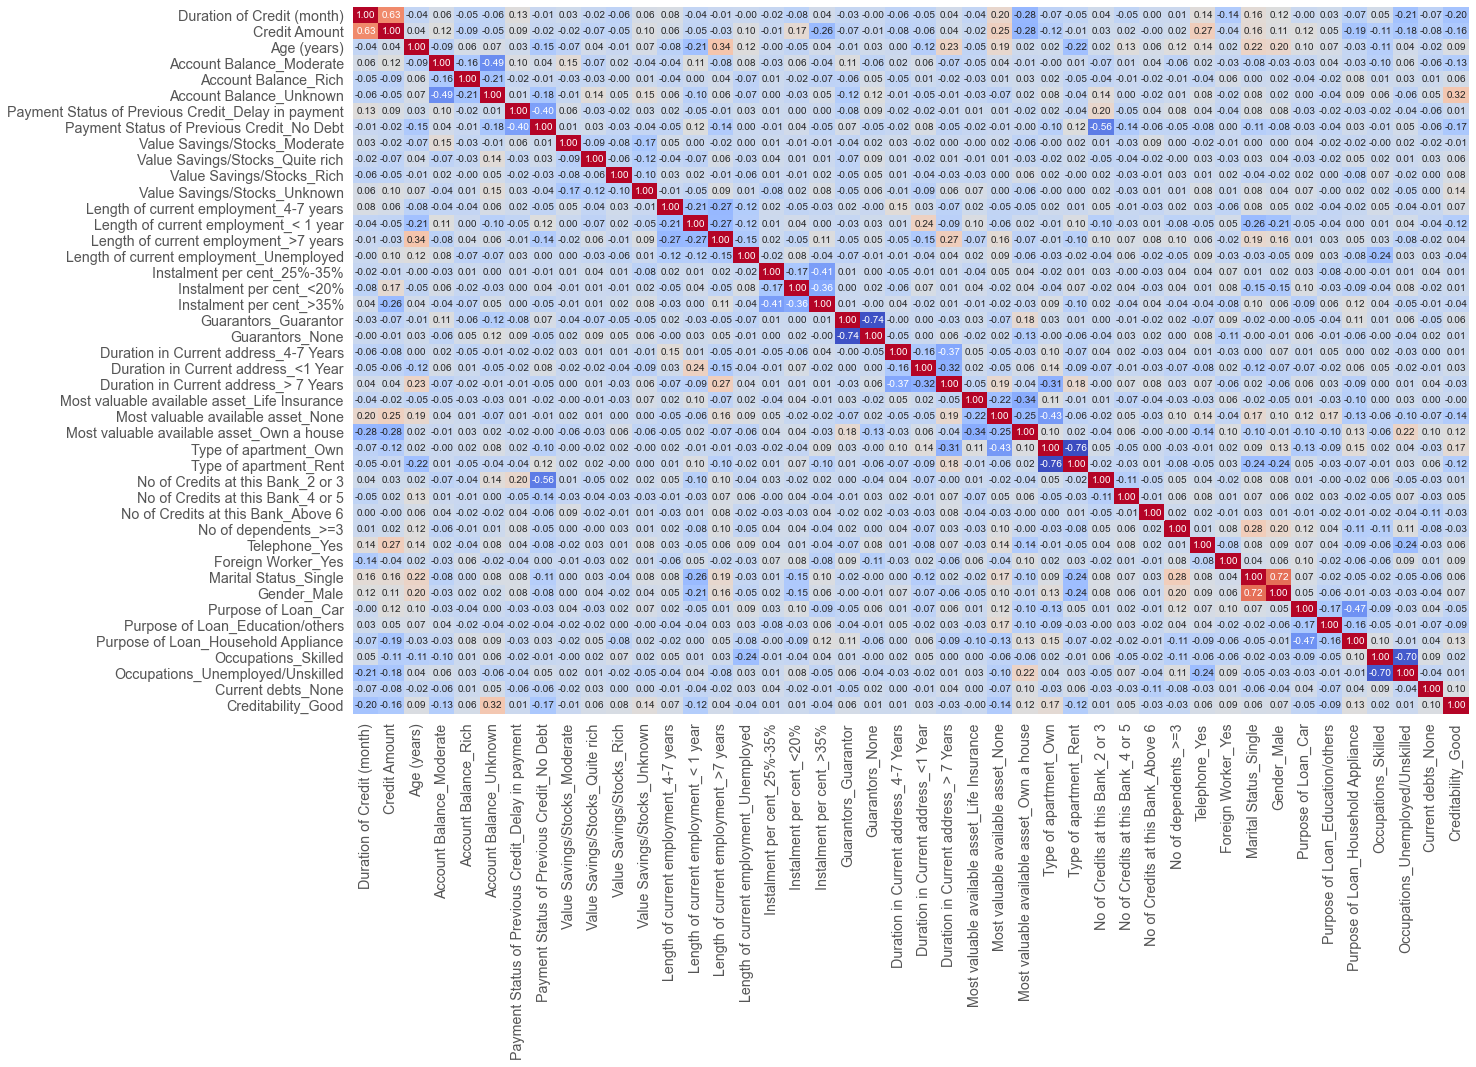

In [49]:
##heatmap for all features
plt.figure(figsize=(20,13))
corr=sns.heatmap(data.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':10},
            cbar=False)

plt.savefig(r'corr.png')

Orange will be used to undergo the predictive modelling process